# Parametric Distribution Estimation

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

## DATA

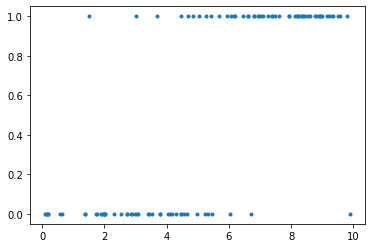

In [2]:
u = np.array([9.5013, 2.3114, 6.0684, 4.8598, 8.9130, 7.6210, 4.5647, 0.1850, 8.2141, 4.4470, 6.1543, 7.9194, 9.2181, 7.3821, 1.7627,
4.0571, 9.3547, 9.1690, 4.1027, 8.9365, 0.5789, 3.5287, 8.1317, 0.0986, 1.3889, 2.0277, 1.9872, 6.0379, 2.7219, 1.9881,
0.1527, 7.4679, 4.4510, 9.3181, 4.6599, 4.1865, 8.4622, 5.2515, 2.0265, 6.7214, 8.3812, 0.1964, 6.8128, 3.7948, 8.3180,
5.0281, 7.0947, 4.2889, 3.0462, 1.8965, 1.9343, 6.8222, 3.0276, 5.4167, 1.5087, 6.9790, 3.7837, 8.6001, 8.5366, 5.9356,
4.9655, 8.9977, 8.2163, 6.4491, 8.1797, 6.6023, 3.4197, 2.8973, 3.4119, 5.3408, 7.2711, 3.0929, 8.3850, 5.6807, 3.7041,
7.0274, 5.4657, 4.4488, 6.9457, 6.2131, 7.9482, 9.5684, 5.2259, 8.8014, 1.7296, 9.7975, 2.7145, 2.5233, 8.7574, 7.3731,
1.3652, 0.1176, 8.9390, 1.9914, 2.9872, 6.6144, 2.8441, 4.6922, 0.6478, 9.8833])
y = np.array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])
plt.scatter(u,y,marker='.')

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
U = np.stack([u,np.ones_like(u)], axis=1)
m, n = U.shape
w = cp.Variable(n)
log_likelihood = cp.sum(cp.multiply(y, U @ w) - cp.logistic(U @ w))
prob = cp.Problem(cp.Maximize(log_likelihood))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal w is")
print(w.value)


The optimal value is -32.97979144010603
The optimal w is
[ 0.9847752  -4.98195139]


In [5]:
def logistic_model(u, w):
    z = np.exp(u.dot(w.value))
    return z/(1 + z)

In [6]:
i = np.arange(u.min(),u.max(),0.2)
j = np.stack([i,np.ones_like(i)], axis=1)
k = logistic_model(j,w)

Text(0, 0.5, 'prob(y=1)')

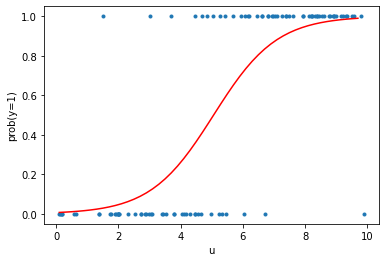

In [9]:
plt.scatter(u,y,marker='.')
plt.plot(i,k,color='r')
plt.xlabel("u")
plt.ylabel("prob(y=1)")

주어진 관측값 (파란점)에 대해서 logistic model에 대한 파라미터를 추정하여 그린 결과이다.   
구해진 분포에 대해서 threshold를 정하면 labeling을 할 수 있다.